## Boosting

Strong learning mode from a weak learning algoirthm

Boosting is an ensemble approach(meaning it involves several trees) that starts from a weaker decision and keeps on building the models such that the final prediction is the weighted sum of all the weaker decision-makers.
The weights are assigned based on the performance of an individual tree.


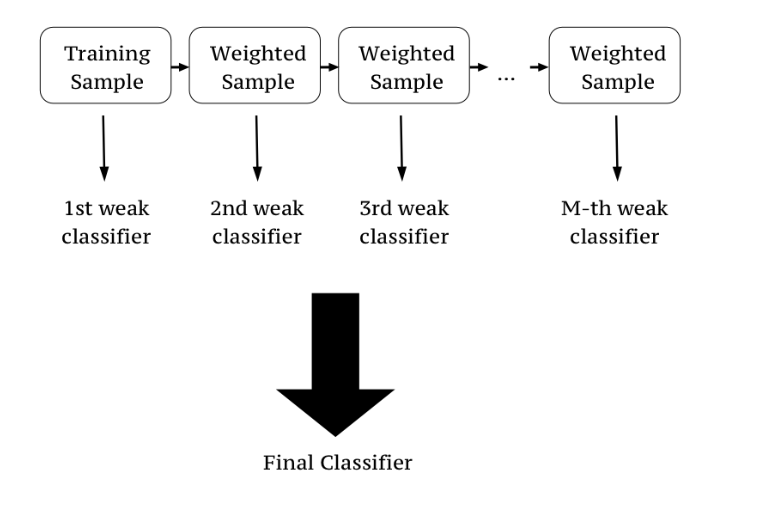

Ensemble parameters are calculated in **stagewise way** which means that while calculating the subsequent weight, the learning from the previous tree is considered as well.


### Weak classifier - why tree?
First what is a weak classifier?
**Weak classifier** -  *slightly better* than random guessing.

Any algorithm could have been used as a base for the boosting technique, but the reason for choosing trees are:

#### Pro's
- computational scalability,
- handles missing values,
- robust to outliers,
- does not require feature scaling,
- can deal with irrelevant inputs,
- interpretable (if small),
- handles mixed predictors as well (quantitive and qualitative)


And that’s where boosting comes into the picture. It minimises the variance by taking into consideration the results from various trees.


**Example**

For understanding this algorithm, we'll use the following simple dataset for heart  patient prediction.

# Ada Boost

- AdaBoost also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. 
- The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. 
- These trees are also called Decision Stumps.

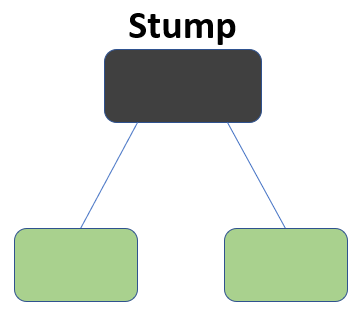

What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.

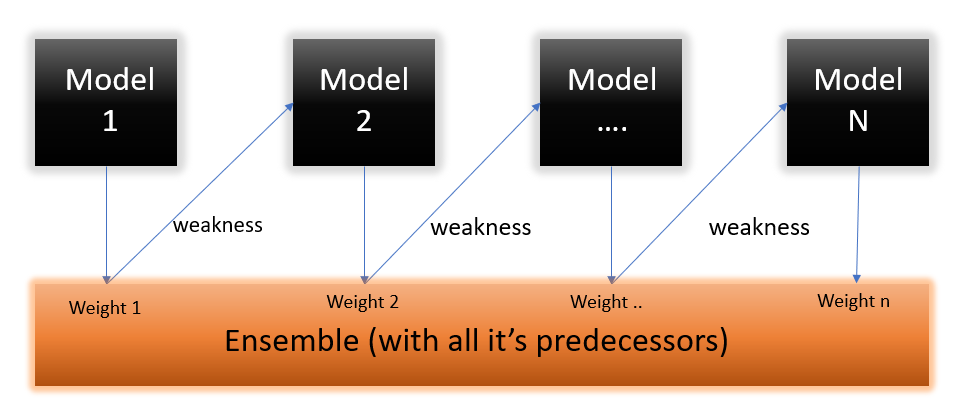

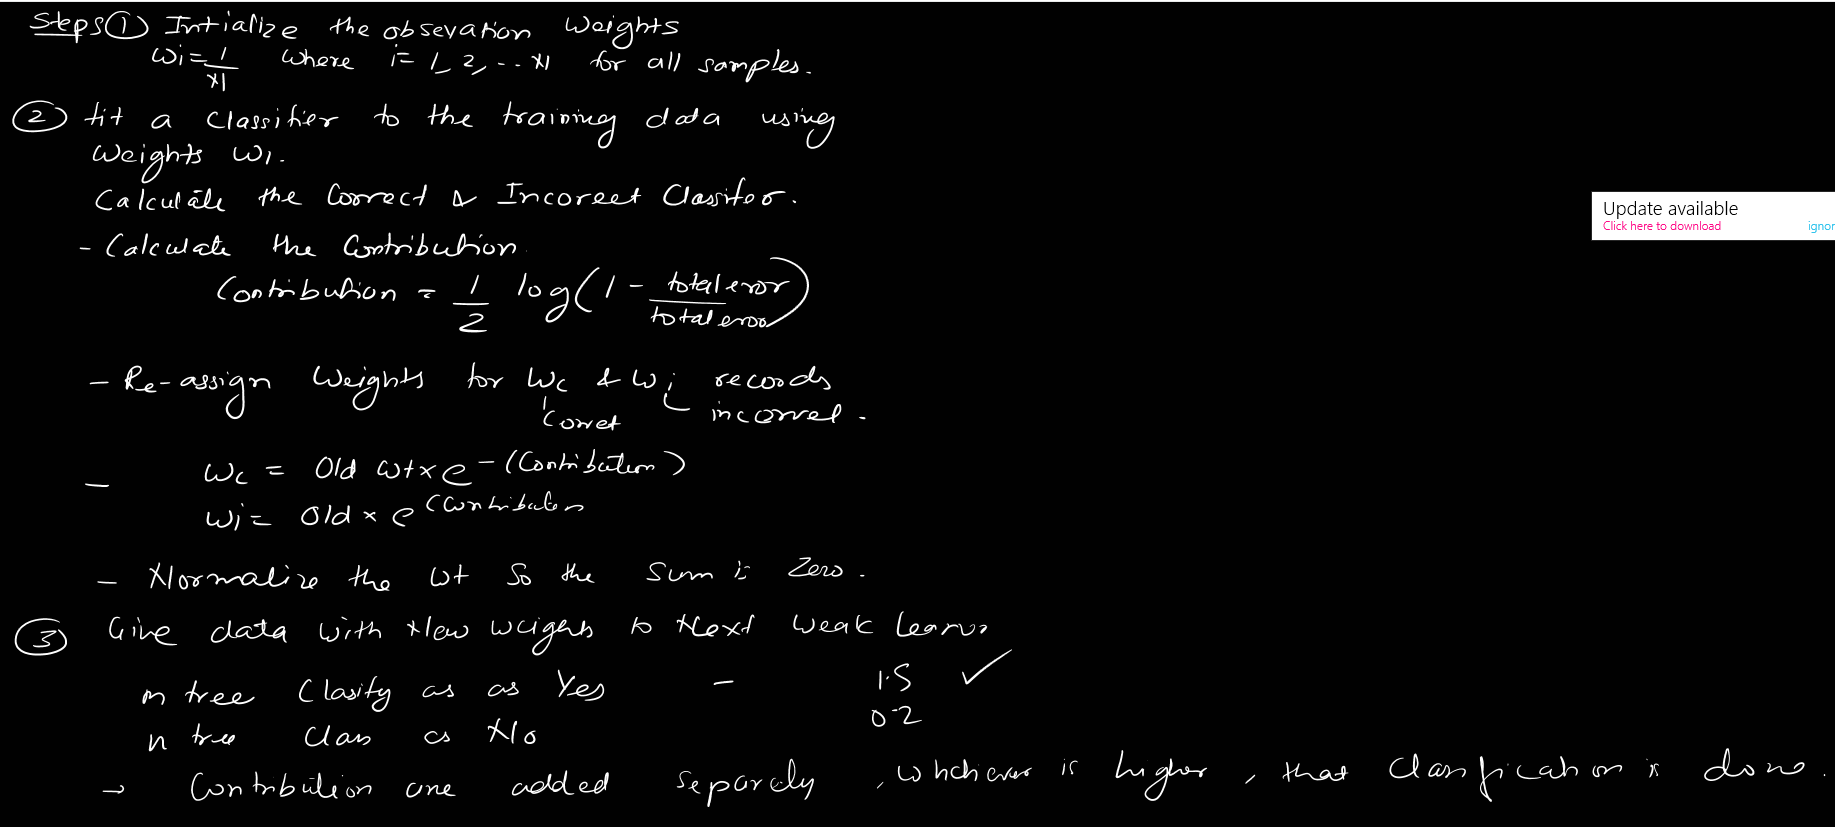

In [22]:
import pandas as pd
heart_data= pd.read_csv('heart_disease.csv')
heart_data

,Is Chest Pain Present,Are any arteries blocked,Weight of the person,Is Heart Patient
0,YES,YES,205,YES
1,NO,YES,180,YES
2,YES,NO,210,YES
3,YES,YES,167,YES
4,NO,YES,156,NO
5,NO,YES,125,NO
6,YES,NO,168,NO
7,YES,YES,172,NO


- There are a total of 8 rows in our dataset. Hence, we’ll initialize the sample weights($w=\frac {1}{N}$) as 1/8 in the beginning. And, at the beginning, all the samples are equally important.

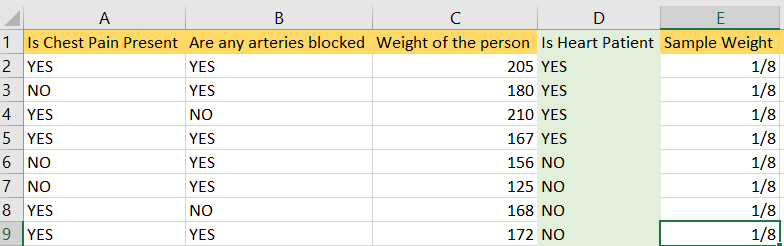

We’ll consider the individual columns to create weak decision-makers as shown below and then try to figure out what are the correct and incorrect predictions based on that column.

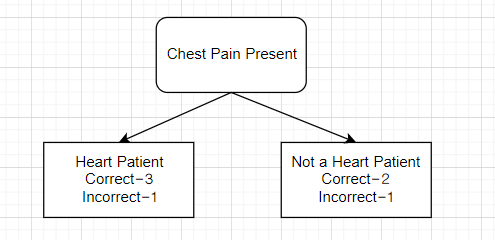

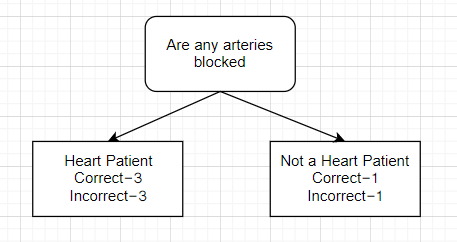

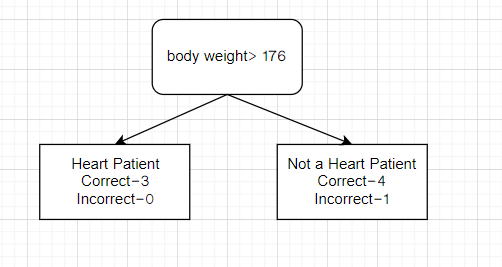

- We’ll now calculate the Gini index of the individual stumps using the formula

     G.I= $\sum (weight of the decision)*(1-(p^2+(1-p)^2))$

        G.I for chest pain tree= 0.47
        G.I for blocked arteries tree= 0.5
        G.I for body-weight tree= 0.2
        
        And, we select the tree with the lowest Gini Index. This will be the first decision-maker for our model.

- Now, we’ll calculate the contribution of this tree(stump) to our final decision using the formula:

Contribution= $½(log (1-total error)/total error)$

    As this stump classified only one data incorrectly out of the 8, hence the total error is 1/8.

    Putting this into the formula we get contribution= 0.97
    
- We’ll now calculate the new weights using the formula:

1. Increase the sample weight for incorrectly classified datapoints
    New weight= old weight*e^ contribution= 1/8* e^0.97=0.33
1. Decrease the sample weight for incorrectly classified datapoints
   New weight= old weight*e^- contribution= 1/8* e^-0.97=0.05

- Populate the new weights as shown below:

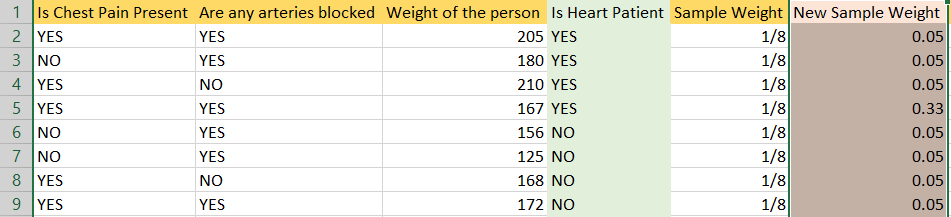

- Normalize the sample weights: If we add all the new sample weights, we get 0.68. Hence, for normalization we divide all the sample weights by 0.68 and then create normalized sample weights as shown below:

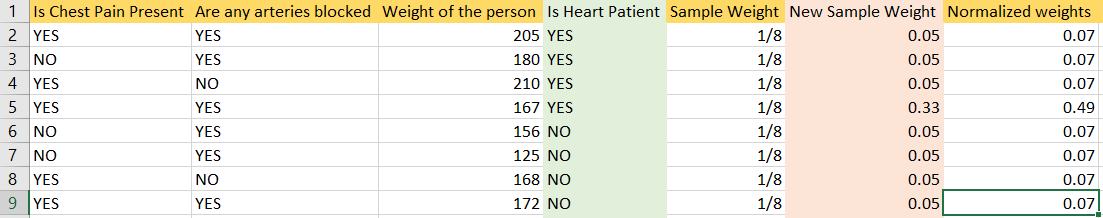



- These new normalized weights will act as the sample weights for the next iteration.

- Then we create new trees which consider the dataset which was prepared using the new sample weights.

- Suppose, m trees(stumps) are classifying a person as a heart patient and n trees(stumps) are classifying a person as a healthy one, then the contribution of m and n trees are added separately and whichever has the higher value, the person is classified as that. 

_For example, if the contribution of m trees is 1.2 and the contribution of n trees is 0.5 then the final result will go in the favour of m trees and the person will be classified as a heart patient._


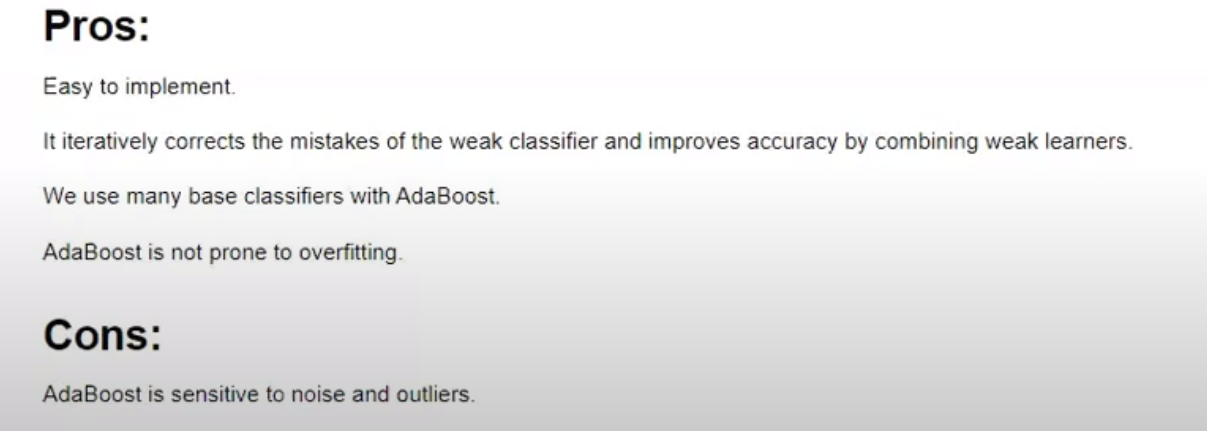

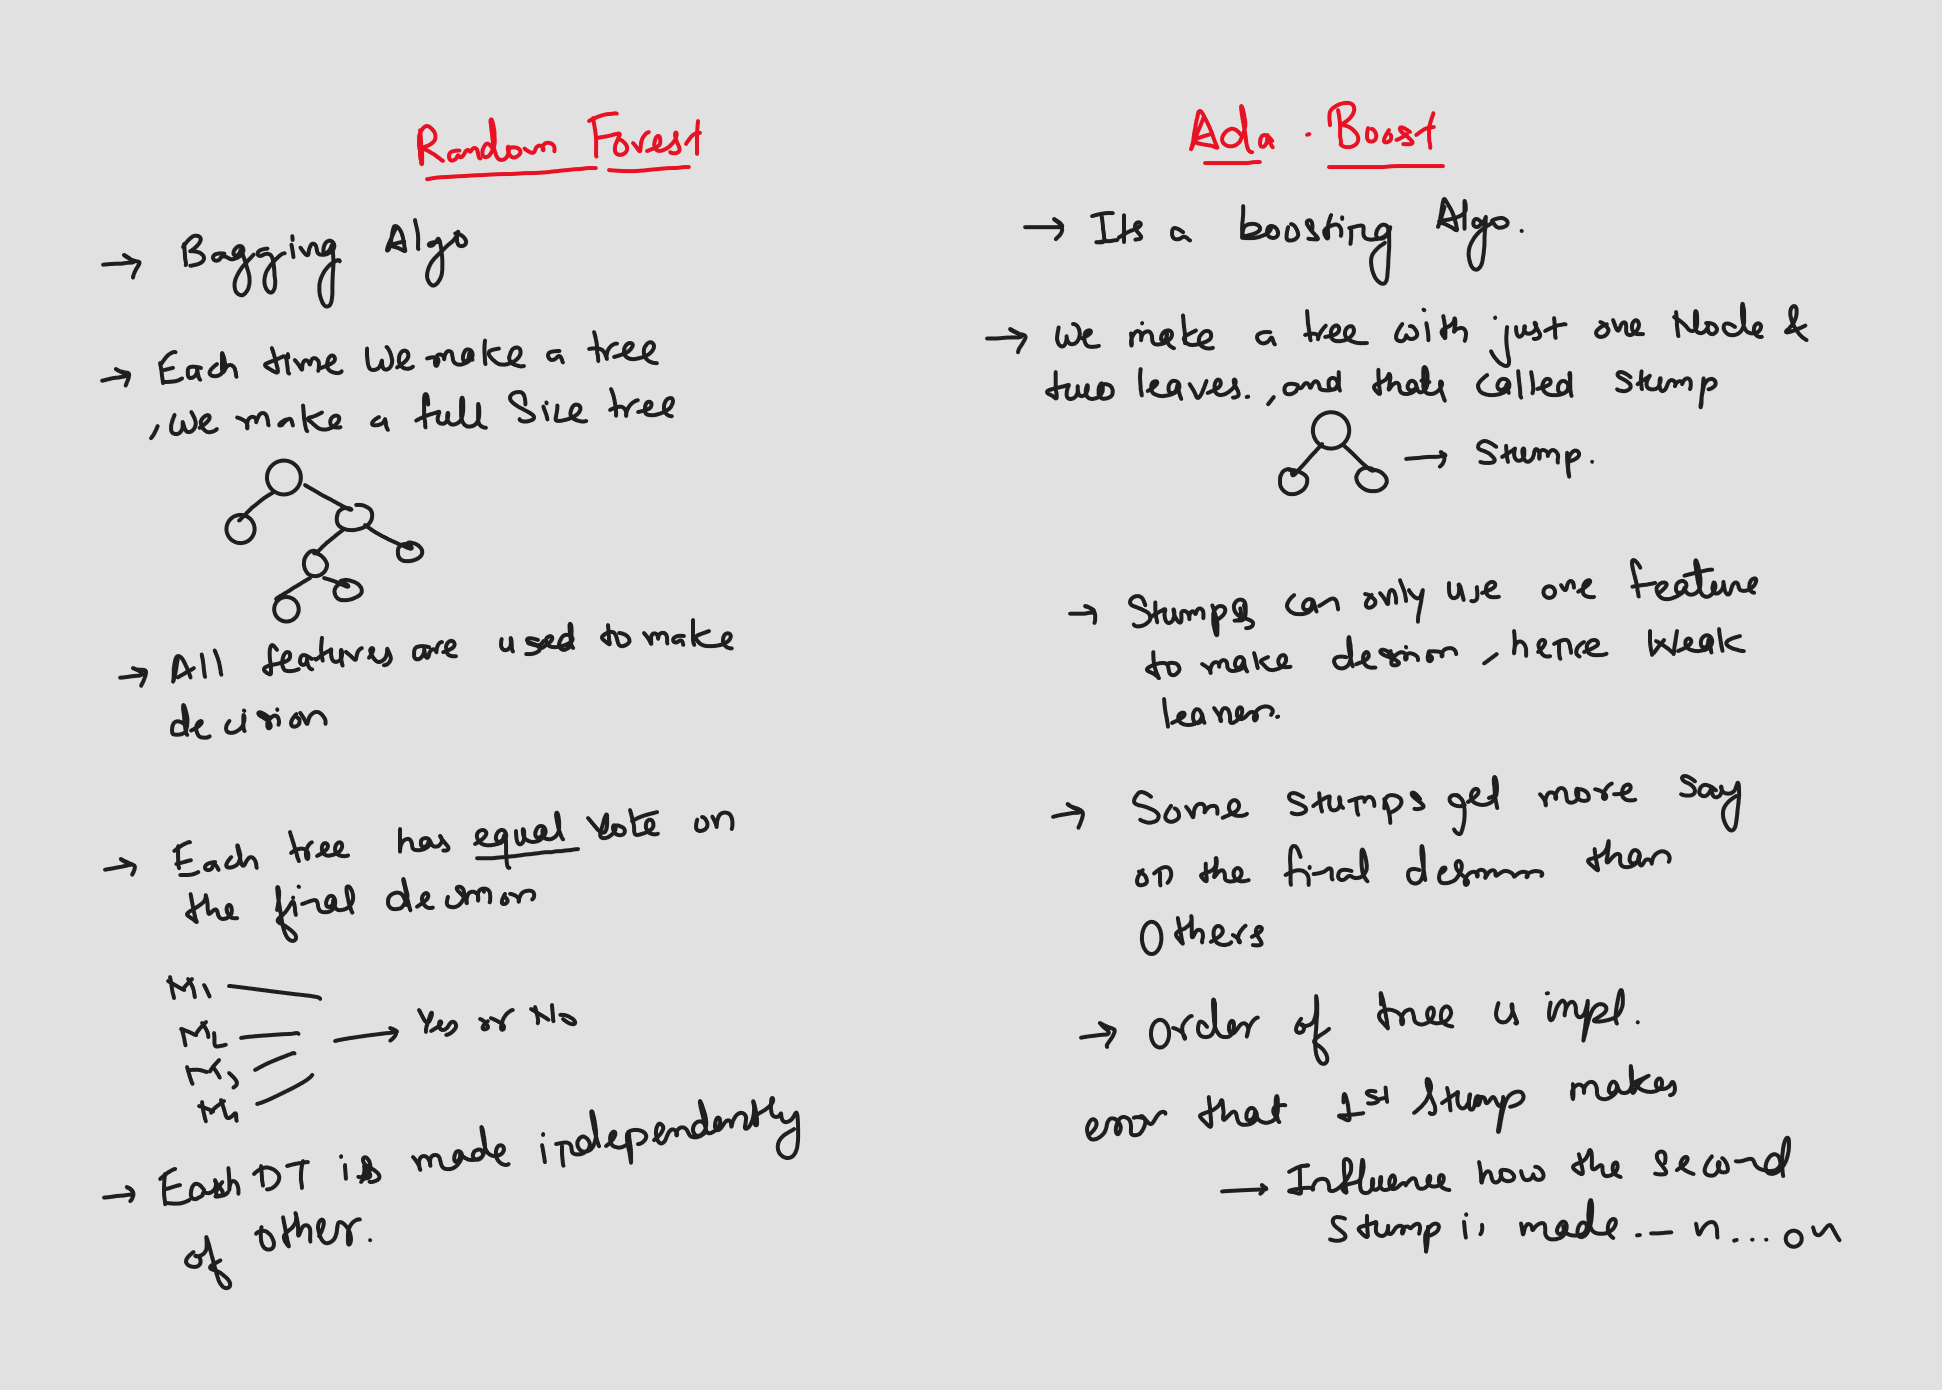

In [1]:

import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target




X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)
Adaboost_model=AdaBoostClassifier(n_estimators=100)
Adaboost_model.fit(X_train,y_train)
predictions = Adaboost_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(accuracy_score(y_test,predictions))

0.972027972027972


In [2]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=1)

from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=1)
dtclf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

dtclf_train_sc = accuracy_score(y_train, dtclf.predict(X_train))
dtclf_test_sc = accuracy_score(y_test, dtclf.predict(X_test))
print('Decision tree train/test accuracies %.3f/%.3f' % (dtclf_train_sc, dtclf_test_sc))

Decision tree train/test accuracies 0.697/0.694


In [3]:
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier(base_estimator=dtclf,
                            n_estimators=50,
                            learning_rate=0.5,
                            algorithm='SAMME.R',
                            random_state=1)

adaclf.fit(X_train, y_train)

adaclf_train_sc = accuracy_score(y_train, adaclf.predict(X_train))
adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
print('AdaBoost train/test accuracies %.3f/%.3f' % (adaclf_train_sc, adaclf_test_sc))

AdaBoost train/test accuracies 0.993/0.972


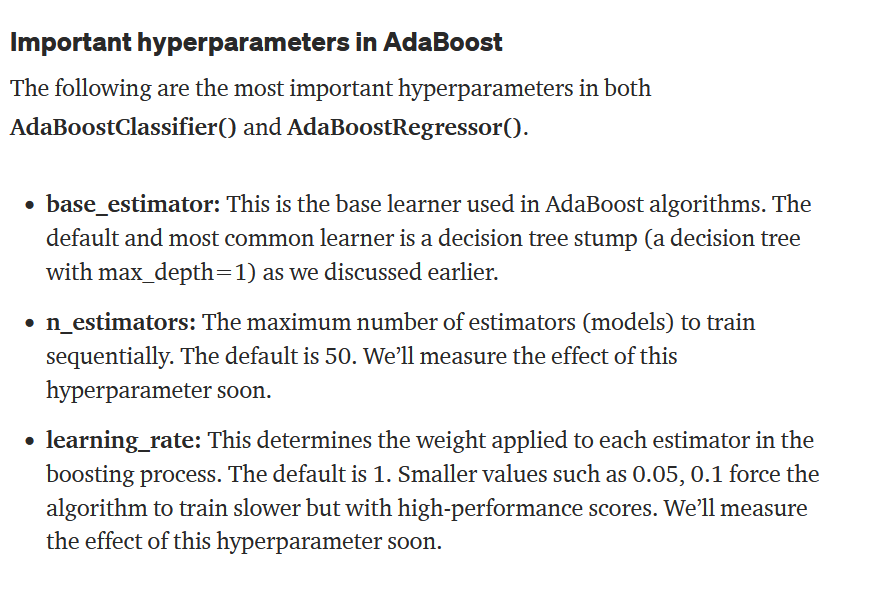

# Measure the effect of n_estimators

We’ll manually measure the effect of the hyperparameter n_estimators by varying its values from 2 to 100 and plot the test scores given by the AdaBoost model.

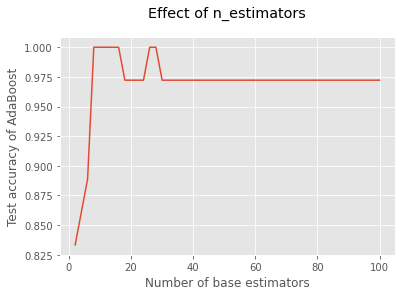

In [4]:
x = list(range(2, 102, 2))
y = []

for i in x:
  adaclf = AdaBoostClassifier(base_estimator=dtclf,
                              n_estimators=i,
                              learning_rate=0.5,
                              algorithm='SAMME.R',
                              random_state=1)
  
  adaclf.fit(X_train, y_train)
  adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
  y.append(adaclf_test_sc)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(x, y)

After about 30 estimators, the accuracy score is constant at 0.972 that we obtained earlier. You can use any integer above 30. But keep in mind that if you increase the value, the algorithm will take much time for training. So, in this case, it is better to use the default value, 50.

# Measure the effect of learning_rate

We’ll manually measure the effect of the hyperparameter learning_rate by varying its values from 0.1 to 1 and plot the test scores given by the AdaBoost model.

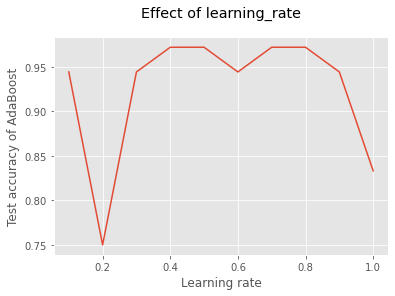

In [5]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y = []

for i in x:
  adaclf = AdaBoostClassifier(base_estimator=dtclf,
                              n_estimators=50,
                              learning_rate=i,
                              algorithm='SAMME.R',
                              random_state=1)
  
  adaclf.fit(X_train, y_train)
  adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
  y.append(adaclf_test_sc)

plt.title("Effect of learning_rate", pad=20)
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(x, y)

The highest accuracy is given at 0.4, 0.5, 0.7 and 0.8. We’ve used 0.5 in the above model.

Both measurements were done manually. There is an easier way to find the optimal values for n_estimators and learning_rate.

# Find the optimal hyperparameter values using Grid Search

Here, we automatically tune (find optimal values) both hyperparameters at the same time by using Grid Search. In contrast, in the previous steps, we tuned one hyperparameter at a time.

SAMME. R uses the probability estimates to update the additive model, while SAMME uses the classifications only. As the example illustrates, the SAMME. R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

In [6]:
hyperparameter_space = {'n_estimators':list(range(2, 102, 2)), 
                        'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(AdaBoostClassifier(base_estimator=dtclf,
                                     algorithm='SAMME.R',
                                     random_state=1),
                  param_grid=hyperparameter_space, 
                  scoring="accuracy", n_jobs=-1, cv=5)

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)

Optimal hyperparameter combination: {'learning_rate': 0.8, 'n_estimators': 42}


We can use these values to get the highest accuracy of the AdaBoost model. Some other possible combinations that give the same accuracy are:

    learning_rate=0.5, n_estimators=50
    learning_rate=0.8, n_estimators=50
    learning_rate=0.8, n_estimators=100
    learning_rate=0.4, n_estimators=50